# FlatIron Module 4 Final Project - Time Series Analysis of Zillow Data

## Evan Okin

We will start by exploring the data, and then when we understand what data we have available, we will decide our methodology for determining the top five zip codes to invest in.

Load necessary packages.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

Load in the dataset.

In [2]:
df=pd.read_csv('zillow_data.csv')

Preview the first several rows of the dataset.

In [3]:
df.head(3)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900


In [4]:
df['RegionID'].head(3)

0    84654
1    90668
2    91982
Name: RegionID, dtype: int64

Check the dataframe for null values.

In [5]:
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
              ... 
2015-11          0
2015-12          0
2016-01          0
2016-02          0
2016-03          0
2016-04          0
2016-05          0
2016-06          0
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08     

Keep RegionID, drop RegionName as we already have descriptors in city and state.

In [6]:
df.drop(['RegionName','Metro','CountyName','SizeRank'],axis=1,inplace=True)

In [7]:
df.shape

(14723, 268)

Check if all states are represented.

In [8]:
df.State.nunique()

51

In [9]:
list(set(df.State))

['DE',
 'MA',
 'OR',
 'UT',
 'NE',
 'IN',
 'VA',
 'WV',
 'OK',
 'OH',
 'CO',
 'AL',
 'MS',
 'MN',
 'IL',
 'NJ',
 'MI',
 'WA',
 'FL',
 'NC',
 'IA',
 'TX',
 'NV',
 'RI',
 'SC',
 'AK',
 'VT',
 'ME',
 'WY',
 'KY',
 'CT',
 'SD',
 'NY',
 'CA',
 'NM',
 'WI',
 'AR',
 'NH',
 'AZ',
 'ID',
 'PA',
 'MO',
 'HI',
 'KS',
 'DC',
 'LA',
 'MT',
 'TN',
 'GA',
 'ND',
 'MD']

In [10]:
df['City'].nunique()

7554

Do we have complete data for the first period, April 1996?

In [11]:
df.isna().sum()

RegionID       0
City           0
State          0
1996-04     1039
1996-05     1039
1996-06     1039
1996-07     1039
1996-08     1039
1996-09     1039
1996-10     1039
1996-11     1039
1996-12     1039
1997-01     1039
1997-02     1039
1997-03     1039
1997-04     1039
1997-05     1039
1997-06     1039
1997-07     1038
1997-08     1038
1997-09     1038
1997-10     1038
1997-11     1038
1997-12     1038
1998-01     1036
1998-02     1036
1998-03     1036
1998-04     1036
1998-05     1036
1998-06     1036
            ... 
2015-11        0
2015-12        0
2016-01        0
2016-02        0
2016-03        0
2016-04        0
2016-05        0
2016-06        0
2016-07        0
2016-08        0
2016-09        0
2016-10        0
2016-11        0
2016-12        0
2017-01        0
2017-02        0
2017-03        0
2017-04        0
2017-05        0
2017-06        0
2017-07        0
2017-08        0
2017-09        0
2017-10        0
2017-11        0
2017-12        0
2018-01        0
2018-02       

In [12]:
blanks=df['1996-04'].isna().sum()

In [13]:
str(round(blanks/len(df),4)*100) + ' % of all of our data is missing for the first period, April 1996. This implies that data will be incomplete.'

'7.06 % of all of our data is missing for the first period, April 1996. This implies that data will be incomplete.'

In [14]:
df.head()

,RegionID,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,Chicago,IL,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,McKinney,TX,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,Katy,TX,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,Chicago,IL,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,El Paso,TX,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [15]:
df.shape

(14723, 268)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(13684, 268)

Check what are the highest home values currently, for the last period, 2017-11.

In [18]:
df['2017-11'].sort_values(ascending=False)[0:10]

21       7371400
10237    6429100
4816     5574100
2026     4596300
4723     4588200
5738     4481700
7596     4244400
742      4171100
7380     4068200
5843     4045200
Name: 2017-11, dtype: int64

By region:

In [19]:
top_home_index_list=list(df['2017-11'].sort_values(ascending=False)[0:10].index)
top_home_index_list

[21, 10237, 4816, 2026, 4723, 5738, 7596, 742, 7380, 5843]

By dollar amount:

In [20]:
top_home_values_list=list(df['2017-11'].sort_values(ascending=False)[0:10].values)
top_home_values_list

[7371400,
 6429100,
 5574100,
 4596300,
 4588200,
 4481700,
 4244400,
 4171100,
 4068200,
 4045200]

Text(0, 0.5, 'Median Home Value')

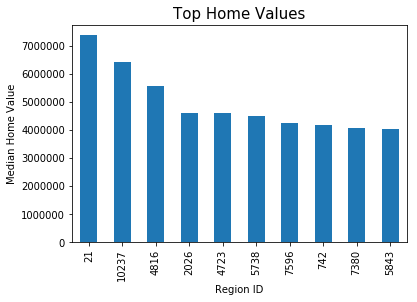

In [21]:
df['2017-11'].sort_values(ascending=False)[0:10].plot.bar(title='Top Home Values')
plt.title('Top Home Values',fontsize=15)
plt.xlabel('Region ID')
plt.ylabel('Median Home Value')

Manipulate the dataframe so that it's easier to analyze.

In [22]:
df.set_index('RegionID',inplace=True)

In [23]:
df_adj=df.T

In [24]:
df_adj

RegionID,84654,90668,91982,84616,93144,91733,61807,84640,91940,97564,...,59187,94711,62556,99032,62697,58333,59107,75672,93733,95851
City,Chicago,McKinney,Katy,Chicago,El Paso,Houston,New York,Chicago,Katy,San Francisco,...,Haverhill,Pine Valley,Esopus,Rhododendron,Bethel,Ashfield,Woodstock,Berea,Mount Crested Butte,Mesquite
State,IL,TX,TX,IL,TX,TX,NY,IL,TX,CA,...,NH,UT,NY,OR,NY,MA,NH,KY,CO,NV
1996-04,334200,235700,210400,498100,77300,95000,152900,216500,95400,766000,...,80800,135900,78300,136200,62500,94600,92700,57100,191100,176400
1996-05,335400,236900,212200,500900,77300,95200,152700,216700,95600,771100,...,80100,136300,78300,136600,62600,94300,92500,57300,192400,176300
1996-06,336500,236700,212200,503100,77300,95400,152600,216900,95800,776500,...,79400,136600,78200,136800,62700,94000,92400,57500,193700,176100
1996-07,337600,235400,210700,504600,77300,95700,152400,217000,96100,781900,...,78600,136900,78200,136800,62700,93700,92200,57700,195000,176000
1996-08,338500,233300,208300,505500,77400,95900,152300,217100,96400,787300,...,77900,137100,78100,136700,62700,93400,92100,58000,196300,175900
1996-09,339500,230600,205500,505700,77500,96100,152000,217200,96700,793000,...,77200,137400,78000,136600,62600,93200,91900,58200,197700,175800
1996-10,340400,227300,202500,505300,77600,96200,151800,217500,96800,799100,...,76400,137700,78000,136400,62500,93000,91700,58400,199100,175800
1996-11,341300,223400,199800,504200,77700,96100,151600,217900,96800,805800,...,75600,137900,78000,136000,62400,92900,91300,58700,200700,176000


Remove City and State so that we just have our time series and can easily take percent changes of our columns. The original dataframe is intact, so we can call on it later to look at City and State within Region IDs

In [25]:
df_adj.drop(['City','State'],axis=0,inplace=True)

In [26]:
df_adj.head(3)
df_adj.index = pd.to_datetime(df_adj.index)

In [27]:
df_adj.index
df_adj.index = pd.to_datetime(df_adj.index)

In [28]:
df_adj.head(3)

RegionID,84654,90668,91982,84616,93144,91733,61807,84640,91940,97564,...,59187,94711,62556,99032,62697,58333,59107,75672,93733,95851
1996-04-01,334200,235700,210400,498100,77300,95000,152900,216500,95400,766000,...,80800,135900,78300,136200,62500,94600,92700,57100,191100,176400
1996-05-01,335400,236900,212200,500900,77300,95200,152700,216700,95600,771100,...,80100,136300,78300,136600,62600,94300,92500,57300,192400,176300
1996-06-01,336500,236700,212200,503100,77300,95400,152600,216900,95800,776500,...,79400,136600,78200,136800,62700,94000,92400,57500,193700,176100


In [29]:
df_adj['year']=df_adj.index.astype(str).str[:4]
df_adj['month']=df_adj.index.astype(str).str[5:8]
df_adj=df_adj.loc[df_adj['month']=='01-']
df_adj

RegionID,84654,90668,91982,84616,93144,91733,61807,84640,91940,97564,...,62556,99032,62697,58333,59107,75672,93733,95851,year,month
1997-01-01,344400,215800,197300,503400,77800,95800,151700,219700,96600,824300,...,78300,135800,62300,92600,90500,59500,204900,176500,1997,01-
1998-01-01,370200,207400,227500,514900,78600,96500,153800,241300,99200,968400,...,79000,124900,61800,97800,87700,66700,238700,178900,1998,01-
1999-01-01,432600,193400,277000,618600,79700,101800,160900,287200,108400,1.2142e+06,...,80600,115600,63100,106800,87200,75500,292700,182500,1999,01-
2000-01-01,516800,211500,313500,699700,82800,105000,174900,348600,114200,1.5803e+06,...,84300,117400,65500,113500,90700,78600,336000,189100,2000,01-
2001-01-01,620200,216900,298700,812500,81000,106000,194300,414400,125600,1.9373e+06,...,93800,121400,70700,120600,96800,80900,370900,200700,2001,01-
2002-01-01,688300,208700,271000,898000,78200,109600,217500,467700,113700,2.1029e+06,...,110000,125200,80300,131400,106900,84600,397200,216100,2002,01-
2003-01-01,735600,191000,213800,971000,81200,114700,245200,511900,118800,2.1411e+06,...,130400,135400,94100,146300,123200,83700,412000,230900,2003,01-
2004-01-01,755300,187700,231800,1.0145e+06,84000,119400,262300,547200,123900,2.1957e+06,...,166900,171600,103200,166000,152500,98000,432200,287600,2004,01-
2005-01-01,818100,199600,237000,1.079e+06,93600,125800,314200,580200,130100,2.5348e+06,...,199600,209800,134900,184300,191800,97800,519800,410400,2005,01-
2006-01-01,884400,202700,231700,1.1528e+06,101000,126200,372200,703500,129000,2.4187e+06,...,216300,283200,157600,205500,222000,113200,602500,445400,2006,01-


In [30]:
len(df_adj)

22

In [31]:
years=len(df_adj)

In [32]:
df_adj.drop(['year','month'],axis=1,inplace=True)
df_adj=df_adj.pct_change()
df_adj.head(3)

/Users/evanokin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


RegionID,84654,90668,91982,84616,93144,91733,61807,84640,91940,97564,...,59187,94711,62556,99032,62697,58333,59107,75672,93733,95851
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-01,0.074913,-0.038925,0.153066,0.022845,0.010283,0.007307,0.013843,0.098316,0.026915,0.174815,...,-0.064603,0.033886,0.008940,-0.080265,-0.008026,0.056156,-0.030939,0.121008,0.164959,0.013598
1999-01-01,0.168558,-0.067502,0.217582,0.201398,0.013995,0.054922,0.046164,0.190220,0.092742,0.253821,...,0.002878,0.019526,0.020253,-0.074460,0.021036,0.092025,-0.005701,0.131934,0.226225,0.020123


In [33]:
df_adj.mean().sort_values(ascending=False).head(10)

RegionID
62033    0.129897
62022    0.129455
60639    0.124485
62027    0.122929
62281    0.119878
62026    0.115820
96127    0.114616
65792    0.112373
62320    0.112173
66125    0.109350
dtype: float64

In [34]:
top_five_list=list(df_adj.mean().sort_values(ascending=False).head(5).index)
top_five_list

[62033, 62022, 60639, 62027, 62281]

Text(0, 0.5, 'Average Annual Percent Return')

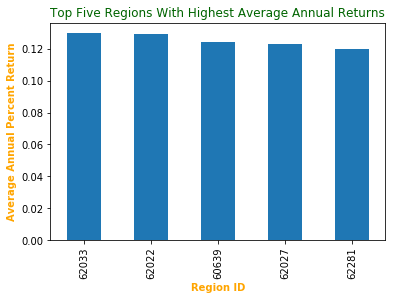

In [35]:
df_adj.mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top Five Regions With Highest Average Annual Returns',color='darkgreen')
plt.xlabel('Region ID',fontweight='bold',color='orange')
plt.ylabel('Average Annual Percent Return',fontweight='bold',color='orange')

Let's observe the top 5 regions (based on the highest average returns per year) to see where the regions are.

In [36]:
df.loc[df.index.isin(top_five_list),:]

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionID,,,,,,,,,,,,,,,,,,,,,
62022,New York,NY,133200.0,132900.0,132500.0,132200.0,131800.0,131600.0,131500.0,131800.0,...,1405100,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700
60639,Jersey City,NJ,137200.0,137800.0,138500.0,139100.0,139600.0,140100.0,140700.0,141400.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
62027,New York,NY,146100.0,146600.0,147200.0,147700.0,148400.0,149300.0,150200.0,151300.0,...,1452000,1506100,1553100,1567700,1559700,1545700,1540200,1553600,1578400,1598700
62033,New York,NY,149200.0,148400.0,147500.0,146600.0,146000.0,145600.0,145400.0,145600.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100
62281,Amagansett,NY,328400.0,327900.0,327100.0,325900.0,324500.0,323000.0,321600.0,320400.0,...,2787200,2852200,2903800,2942600,2976300,3008500,3051700,3099000,3132200,3141100


We can immediately see that if we were to recommend this list of five Regions, there would be major concentration risk - four regions are in NY and one region is in NJ, right near NY. This could be problematic for tail risk scenarios, such as terrorist attacks.

Let's now explore the top ten RegionID's along with the city and state.

In [37]:
top_ten_list=list(df_adj.mean().sort_values(ascending=False).head(10).index)
top_ten_list

[62033, 62022, 60639, 62027, 62281, 62026, 96127, 65792, 62320, 66125]

In [38]:
df.loc[df.index.isin(top_ten_list),['City','State']]

,City,State
RegionID,,
62026,New York,NY
62022,New York,NY
60639,Jersey City,NJ
66125,Washington,DC
62027,New York,NY
62033,New York,NY
96127,Los Angeles,CA
65792,Philadelphia,PA
62281,Amagansett,NY


One possible solution would be to suggest zip codes in different regions. We can include NY, NJ, DC, CA, and PA.

In [39]:
adjusted_five_list=[62033,60639,66125,96127,65792]

In [40]:
df_adjusted_five=df.loc[df.index.isin(adjusted_five_list),:]
df_adjusted_five

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionID,,,,,,,,,,,,,,,,,,,,,
60639,Jersey City,NJ,137200.0,137800.0,138500.0,139100.0,139600.0,140100.0,140700.0,141400.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
66125,Washington,DC,92000.0,92600.0,93200.0,93900.0,94600.0,95400.0,96100.0,96800.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300
62033,New York,NY,149200.0,148400.0,147500.0,146600.0,146000.0,145600.0,145400.0,145600.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100
96127,Los Angeles,CA,234300.0,234200.0,234200.0,234200.0,234100.0,234200.0,234600.0,235300.0,...,1994700,2017200,2043700,2056400,2046300,2028900,2039400,2058500,2064200,2056800
65792,Philadelphia,PA,32600.0,32700.0,32800.0,32800.0,32900.0,32900.0,32900.0,32900.0,...,247500,249000,251600,253900,255700,257100,258000,258500,260500,262300


Not surprisingly, these are all major metropolitan cities. Home values tend to appreciate in major cities, so our results pass the "sniff test."

In [41]:
df_adjusted_five.drop(['City','State'],axis=1,inplace=True)
df_adjusted_five=df_adjusted_five.T
df_adjusted_five

RegionID,60639,66125,62033,96127,65792
1996-04,137200.0,92000.0,149200.0,234300.0,32600.0
1996-05,137800.0,92600.0,148400.0,234200.0,32700.0
1996-06,138500.0,93200.0,147500.0,234200.0,32800.0
1996-07,139100.0,93900.0,146600.0,234200.0,32800.0
1996-08,139600.0,94600.0,146000.0,234100.0,32900.0
1996-09,140100.0,95400.0,145600.0,234200.0,32900.0
1996-10,140700.0,96100.0,145400.0,234600.0,32900.0
1996-11,141400.0,96800.0,145600.0,235300.0,32900.0
1996-12,142300.0,97700.0,146100.0,236600.0,32800.0
1997-01,143500.0,98600.0,146600.0,238500.0,32800.0


Text(0, 0.5, 'Median Home Value')

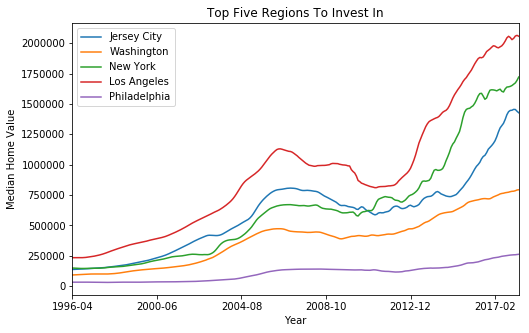

In [42]:
df_adjusted_five.plot(figsize=(8,5))
plt.title('Top Five Regions To Invest In')
plt.legend(['Jersey City','Washington','New York','Los Angeles','Philadelphia'],loc=0)
plt.xlabel('Year')
plt.ylabel('Median Home Value')

In [43]:
df_adjusted_five.corr()

RegionID,60639,66125,62033,96127,65792
RegionID,,,,,
60639,1.000000,0.960577,0.927837,0.955443,0.968654
66125,0.960577,1.000000,0.962411,0.981983,0.968706
62033,0.927837,0.962411,1.000000,0.980586,0.959102
96127,0.955443,0.981983,0.980586,1.000000,0.960940
65792,0.968654,0.968706,0.959102,0.960940,1.000000


This could be problematic, we see a very high level of correlation between average returns for all of these. While generally the volatility has been in the positive direction, it is something to consider. Let's look to see if we can find any regions that exhibit lower correlation but also have high returns.

In [44]:
top_twenty_list=list(df_adj.mean().sort_values(ascending=False).head(20).index)
top_twenty_list

[62033,
 62022,
 60639,
 62027,
 62281,
 62026,
 96127,
 65792,
 62320,
 66125,
 66102,
 62310,
 62032,
 62283,
 93399,
 71037,
 88975,
 72928,
 58634,
 96007]

In [45]:
df_adjusted_twenty=df.loc[df.index.isin(top_twenty_list),:]
df_adjusted_twenty.drop(['City','State'],axis=1,inplace=True)
df_adjusted_twenty=df_adjusted_twenty.T
df_adjusted_twenty.corr()

RegionID,62032,62026,96007,62022,60639,66125,62027,62033,96127,65792,71037,62310,72928,58634,88975,62281,62283,66102,62320,93399
RegionID,,,,,,,,,,,,,,,,,,,,
62032,1.000000,0.970644,0.951350,0.982941,0.955462,0.972125,0.990649,0.982953,0.989940,0.965454,0.931186,0.916745,0.694199,0.955040,0.903682,0.950415,0.933244,0.763296,0.963401,0.923007
62026,0.970644,1.000000,0.937135,0.986705,0.932436,0.981807,0.964480,0.977625,0.975908,0.966895,0.893165,0.914538,0.637162,0.949920,0.941243,0.972066,0.956656,0.778830,0.980839,0.943835
96007,0.951350,0.937135,1.000000,0.938523,0.966692,0.982805,0.919332,0.918456,0.964415,0.943022,0.923616,0.929320,0.844619,0.937058,0.948703,0.970526,0.956824,0.899787,0.956366,0.953266
62022,0.982941,0.986705,0.938523,1.000000,0.942295,0.977588,0.984065,0.992714,0.984944,0.974455,0.889975,0.901696,0.635035,0.952708,0.912060,0.958543,0.938130,0.744216,0.977997,0.919597
60639,0.955462,0.932436,0.966692,0.942295,1.000000,0.960577,0.942619,0.927837,0.955443,0.968654,0.938502,0.969496,0.804760,0.948524,0.944171,0.969145,0.964857,0.843463,0.967767,0.959299
66125,0.972125,0.981807,0.982805,0.977588,0.960577,1.000000,0.953103,0.962411,0.981983,0.968706,0.909936,0.932398,0.752227,0.954835,0.958550,0.985529,0.970246,0.855814,0.983533,0.958649
62027,0.990649,0.964480,0.919332,0.984065,0.942619,0.953103,1.000000,0.990616,0.980165,0.957791,0.914752,0.895301,0.624745,0.957663,0.873416,0.930347,0.910255,0.693074,0.954549,0.893925
62033,0.982953,0.977625,0.918456,0.992714,0.927837,0.962411,0.990616,1.000000,0.980586,0.959102,0.897128,0.887477,0.609843,0.957557,0.883297,0.936359,0.915893,0.699617,0.962205,0.895246
96127,0.989940,0.975908,0.964415,0.984944,0.955443,0.981983,0.980165,0.980586,1.000000,0.960940,0.936679,0.915425,0.708973,0.969010,0.916624,0.958838,0.935156,0.781077,0.970542,0.933535


Text(0.5, 1.0, 'Correlation Heatmap')

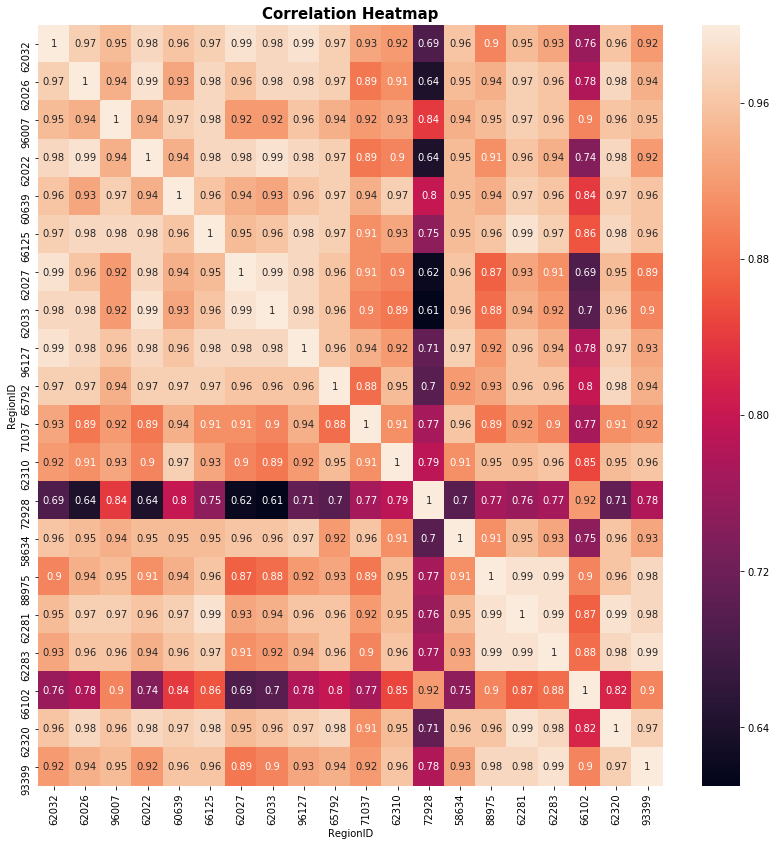

In [46]:
corr=df_adjusted_twenty.corr()
plt.figure(figsize=(14,14)) 
sns.heatmap(round(corr,2),annot=True) 
corr.style.background_gradient(cmap='coolwarm') 
plt.title('Correlation Heatmap',fontweight='bold',fontsize=15)

We can see that Region 72928 exhibits better correlation across the board. We can remove NJ (closest to NY, concentration risk).

In [47]:
adjusted_five_list=[62033,66125,96127,65792,72928]

In [48]:
df_adjusted_five=df.loc[df.index.isin(adjusted_five_list),:]
df_adjusted_five

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionID,,,,,,,,,,,,,,,,,,,,,
66125,Washington,DC,92000.0,92600.0,93200.0,93900.0,94600.0,95400.0,96100.0,96800.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300
62033,New York,NY,149200.0,148400.0,147500.0,146600.0,146000.0,145600.0,145400.0,145600.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100
96127,Los Angeles,CA,234300.0,234200.0,234200.0,234200.0,234100.0,234200.0,234600.0,235300.0,...,1994700,2017200,2043700,2056400,2046300,2028900,2039400,2058500,2064200,2056800
65792,Philadelphia,PA,32600.0,32700.0,32800.0,32800.0,32900.0,32900.0,32900.0,32900.0,...,247500,249000,251600,253900,255700,257100,258000,258500,260500,262300
72928,Rotonda West,FL,39200.0,39100.0,38900.0,38900.0,39000.0,39100.0,39500.0,39900.0,...,242700,245100,246900,248100,249800,252300,254700,256500,256700,255700


In [49]:
df_adjusted_five.drop(['City','State'],axis=1,inplace=True)
df_adjusted_five=df_adjusted_five.T
df_adjusted_five.corr()

/Users/evanokin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


RegionID,66125,62033,96127,65792,72928
RegionID,,,,,
66125,1.000000,0.962411,0.981983,0.968706,0.752227
62033,0.962411,1.000000,0.980586,0.959102,0.609843
96127,0.981983,0.980586,1.000000,0.960940,0.708973
65792,0.968706,0.959102,0.960940,1.000000,0.699549
72928,0.752227,0.609843,0.708973,0.699549,1.000000


Text(0, 0.5, 'Median Home Value')

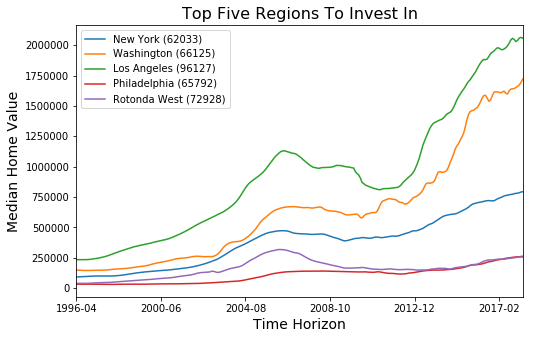

In [50]:
df_adjusted_five.plot(figsize=(8,5))
plt.title('Top Five Regions To Invest In', fontsize=16)
plt.legend(['New York (62033)','Washington (66125)','Los Angeles (96127)','Philadelphia (65792)','Rotonda West (72928)'],loc=0)
plt.xlabel('Time Horizon', fontsize=14)
plt.ylabel('Median Home Value', fontsize=14)

We now have a collection of zip codes that has taken into account the following:

- high average returns (assessed annually, but graphed monthly)
- limited concentration risk
- reduced correlation (to assist in down markets)

How much would we have earned if we put $20 million into each of these five regions, at the start of the time period?

In [51]:
lower_sum = 0
upper_sum = 0
for i in adjusted_five_list:
    #print('Confidence Intervals of True CAGRs')
    print(i, df_adj[i].mean(), df_adj[i].std())
    #print(i, df_adj[i].mean()-1.96*(df_adj[i].std()/np.sqrt(22)),df_adj[i].mean()+1.96*(df_adj[i].std()/np.sqrt(22)))
    #lower_sum += .2*df_adj[i].mean()-1.96*(df_adj[i].std()/np.sqrt(22))
    #upper_sum += .2*df_adj[i].mean()+1.96*(df_adj[i].std()/np.sqrt(22))
    #print(lower_sum)
    #print(upper_sum)

62033 0.1298974101748302 0.1348333712111572
66125 0.10935021075413086 0.1180703288320778
96127 0.11461550079645373 0.12603927798462775
65792 0.11237336866971737 0.15236381636468369
72928 0.10407073557568947 0.17406552115745713


In [52]:
CAGR_simulations=[]
mu1, sigma1 = df_adj[62033].mean(), df_adj[62033].std()
mu2, sigma2 = df_adj[66125].mean(), df_adj[66125].std()
mu3, sigma3 = df_adj[96127].mean(), df_adj[96127].std()
mu4, sigma4 = df_adj[65792].mean(), df_adj[65792].std()
mu5, sigma5 = df_adj[72928].mean(), df_adj[72928].std()
n = 1000
s = (np.random.normal(mu1, sigma1, n) + np.random.normal(mu2, sigma2, n) + np.random.normal(mu3, sigma3, n)
+ np.random.normal(mu4, sigma4, n) + np.random.normal(mu5, sigma5, n))/5
CAGR_simulations.append(s)
df_CAGR=pd.DataFrame(CAGR_simulations)
df_CAGR.T.describe()

,0
count,1000.000000
mean,0.115239
std,0.062337
min,-0.100316
25%,0.073832
50%,0.114096
75%,0.157885
max,0.352276


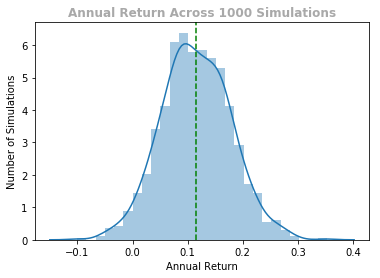

In [53]:
sns.distplot(s)
plt.title('Annual Return Across 1000 Simulations',fontweight='bold',color='darkgrey')
plt.xlabel('Annual Return',fontsize=10)
plt.ylabel('Number of Simulations',fontsize=10)
plt.axvline(x=.114703, color='g', linestyle='--')

In [54]:
for i in range(0,101,10):
    print(i, df_CAGR.T.quantile(i/100))

0 0   -0.100316
Name: 0.0, dtype: float64
10 0    0.038622
Name: 0.1, dtype: float64
20 0    0.063495
Name: 0.2, dtype: float64
30 0    0.081165
Name: 0.3, dtype: float64
40 0    0.097163
Name: 0.4, dtype: float64
50 0    0.114096
Name: 0.5, dtype: float64
60 0    0.130287
Name: 0.6, dtype: float64
70 0    0.148645
Name: 0.7, dtype: float64
80 0    0.167459
Name: 0.8, dtype: float64
90 0    0.193636
Name: 0.9, dtype: float64
100 0    0.352276
Name: 1.0, dtype: float64


Across 1000 simulations,
- the median CAGR was 11.41%
- the maximum CAGR was 31.71%
- even a bad year - the 10% percentile - had a CAGR of 2.90%

In [55]:
df_adjusted_five.tail(1)

RegionID,66125,62033,96127,65792,72928
2018-04,793300.0,1721100.0,2056800.0,262300.0,255700.0


In [56]:
total_investment = 0
for i in df_adjusted_five.columns:
    total_investment += 20*(df_adjusted_five[i][len(df_adjusted_five)-1])/ (df_adjusted_five[i][0])
    print(i, 20*(df_adjusted_five[i][len(df_adjusted_five)-1])/ (df_adjusted_five[i][0]))
total_investment=round(total_investment,2)
print('$100M would grow to $' + str(total_investment) + 'M')

66125 172.45652173913044
62033 230.71045576407508
96127 175.5697823303457
65792 160.920245398773
72928 130.4591836734694
$100M would grow to $870.12M


We can see that we would have earned a ton! Let's find out what this corresponds to on a CAGR basis.

In [57]:
((total_investment/100)**(1/years))-1

0.10333690068279622

This corresponds to a healthy CAGR of 10.33% per year for 22 years.

Let's verify using principles.

In [58]:
100*(1.1033369**years)

870.119988153642

How would a random sample of 5 regions have performed? 

np.random.seed(88)
df.sample(n=5)

The randomly generated regions are:

- 72440 (Miami, FL)
- 79055 (Superior, MI)
- 91854 (Huntsville, TX)
- 69395 (Henderson, NC)
- 97883 (Novato, CA)

In [59]:
adjusted_five_random=[72440,79055,91854,69395,97883]

In [60]:
df_adjusted_five_random=df.loc[df.index.isin(adjusted_five_random),:]
df_adjusted_five_random

,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionID,,,,,,,,,,,,,,,,,,,,,
79055,Superior,MI,73800.0,74200.0,74600.0,74900.0,75300.0,75600.0,75900.0,76200.0,...,109700,110700,110800,111700,113600,115900,118300,120900,122900,124500
91854,Huntsville,TX,91800.0,91900.0,91900.0,92000.0,92100.0,92100.0,92200.0,92200.0,...,184500,185200,185700,186200,186400,186700,187000,186800,186400,186000
72440,Miami,FL,126800.0,126900.0,127000.0,127100.0,127200.0,127400.0,127500.0,127800.0,...,744900,744700,759200,771100,772500,774400,783900,788900,790800,794000
69395,Henderson,NC,72200.0,72500.0,72800.0,73100.0,73400.0,73700.0,73900.0,74200.0,...,120100,121400,122700,123200,122800,122300,122300,123700,126000,127200
97883,Novato,CA,269600.0,268900.0,268200.0,267500.0,267100.0,266900.0,267100.0,267500.0,...,784500,789600,796100,804200,815800,827000,834500,842300,852300,857100


In [61]:
df_adjusted_five_random.drop(['City','State'],axis=1,inplace=True)
df_adjusted_five_random=df_adjusted_five_random.T

In [62]:
total_investment = 0
for i in df_adjusted_five_random.columns:
    total_investment += 20*(df_adjusted_five_random[i][len(df_adjusted_five_random)-1])/ (df_adjusted_five_random[i][0])
    print(i, 20*(df_adjusted_five_random[i][len(df_adjusted_five_random)-1])/ (df_adjusted_five_random[i][0]))
total_investment=round(total_investment,2)
print('$100M would grow to $' + str(total_investment) + 'M')

79055 33.739837398373986
91854 40.52287581699346
72440 125.23659305993691
69395 35.23545706371191
97883 63.583086053412465
$100M would grow to $298.32M


In [63]:
((total_investment/100)**(1/years))-1

0.050936489425126075

In our carefully selected zip codes, we would turn 100M into 870M, but our randomly selected set of zip codes would turn 100M into 298M.

In [64]:
df_adjusted_five.describe()

RegionID,66125,62033,96127,65792,72928
count,265.000000,2.650000e+02,2.650000e+02,265.000000,265.000000
mean,384943.773585,6.400475e+05,9.276434e+05,108076.226415,162565.660377
std,203111.477193,4.464593e+05,5.133110e+05,64603.371483,74820.433461
min,92000.000000,1.454000e+05,2.341000e+05,30500.000000,38900.000000
25%,168600.000000,2.518000e+05,4.789000e+05,36600.000000,105100.000000
50%,416900.000000,6.184000e+05,8.943000e+05,124400.000000,159500.000000
75%,472200.000000,7.371000e+05,1.118000e+06,140000.000000,215100.000000
max,793300.000000,1.721100e+06,2.064200e+06,262300.000000,318000.000000


In [65]:
df_adj[66125].describe()

count    21.000000
mean      0.109350
std       0.118070
min      -0.063248
25%       0.016397
50%       0.104045
75%       0.165690
max       0.418697
Name: 66125, dtype: float64

Let's look at some plots for these time series.

In [66]:
df_adjusted_five.to_csv('time_series_file.csv')

### Stationarity - Plots

Test for stationarity.

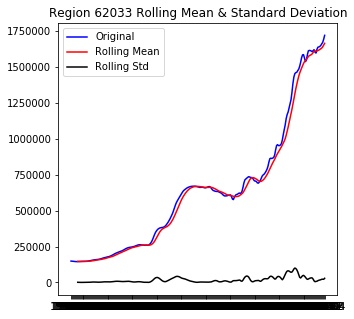

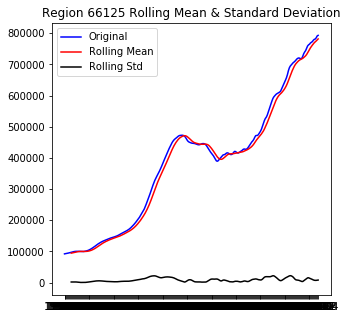

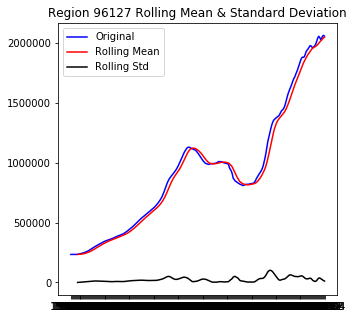

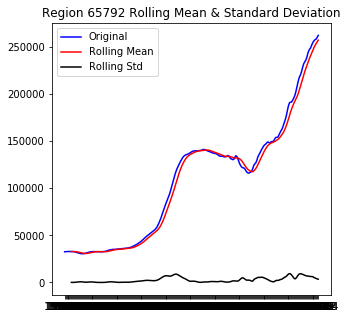

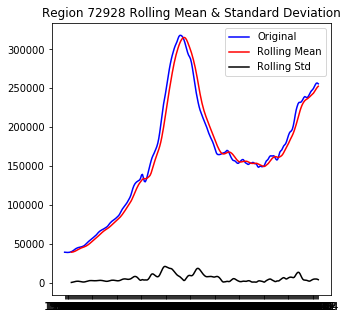

In [67]:
for i in adjusted_five_list:
    rolmean = df_adjusted_five[i].rolling(window = 8, center = False).mean()
    rolstd = df_adjusted_five[i].rolling(window = 8, center = False).std()
    fig = plt.figure(figsize=(5,5))
    orig = plt.plot(df_adjusted_five[i], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Region ' + str(i) + ' Rolling Mean & Standard Deviation')
    plt.show(block=False)

All five regions have a mean that is not constant over time (although standard deviation is), which tells us that the time series are <b>not</b> stationary.

### Stationary - Dickey-Fuller Test

We can run a Dickey-Fuller test to confirm that the time series are not stationary.

Null hypothesis (Ho): the time series is not stationary

Alternative hypothesis (Ha): the time series is stationary

In [68]:
for i in df_adjusted_five:
    dickeyfullertest = adfuller(df_adjusted_five[i])
    dfoutput = pd.Series(dickeyfullertest[1:2], index=['p-value'])
    print ('Results of Dickey-Fuller Test (for Region ' + str(i) + ')')  
    print(dfoutput)

Results of Dickey-Fuller Test (for Region 66125)
p-value    0.823107
dtype: float64
Results of Dickey-Fuller Test (for Region 62033)
p-value    0.994517
dtype: float64
Results of Dickey-Fuller Test (for Region 96127)
p-value    0.81789
dtype: float64
Results of Dickey-Fuller Test (for Region 65792)
p-value    0.9585
dtype: float64
Results of Dickey-Fuller Test (for Region 72928)
p-value    0.097141
dtype: float64


All p-values exceed alpha of .05, implying that the time series is not stationary. In fact, all but Rotanda West, Florida have very high p-values (above .80)

In [69]:
df_adjusted_five.tail(1)

RegionID,66125,62033,96127,65792,72928
2018-04,793300.0,1721100.0,2056800.0,262300.0,255700.0


We can decide how we want to allocate the $100M by number of homes of investment.

In [70]:
for i in df_adjusted_five:
    print(i, 20000000/df_adjusted_five[i].tail(1))

66125 2018-04    25.211143
Name: 66125, dtype: float64
62033 2018-04    11.620475
Name: 62033, dtype: float64
96127 2018-04    9.723843
Name: 96127, dtype: float64
65792 2018-04    76.24857
Name: 65792, dtype: float64
72928 2018-04    78.21666
Name: 72928, dtype: float64


These are median home values, so while not exact, a proposal would be to purchase the following investment:

- Region 66125: Purchase 25 homes
- Region 62033: Purchase 12 homes
- Region 96127: Purchase 10 homes
- Region 65792: Purchase 76 homes
- Region 72928: Purchase 78 homes

Next steps include:

- We dropped null values, but this removed 7% of the dataset that did not have values as early as 1996. While we had 93% of the data at our disposal, we could come up with a different methodology for data removal.

- While we looked at correlations, we could have done an actual minimization on the correlations to really capture benefits from diversification.

- Do more forward-looking research. Our analysis assumes that historical performance is an indication of future success. In reality, that's not how the world works, if you want to be in the top tier of wealth you need to think differently than others.

- House prices are median, which means that some regions could be risky below the median. Explore further datasets.